In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [7]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [8]:
match.shape

(636, 18)

In [9]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


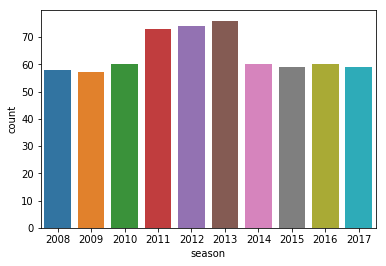

In [11]:
sns.countplot('season', data=match)

In [12]:
match['venue'].value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

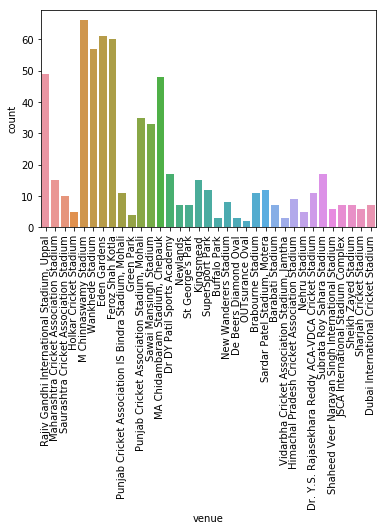

In [13]:
sns.countplot('venue', data=match)
plt.xticks(rotation='vertical')


In [14]:
match(['team2'].value_counts() + match['team1'].value_counts()).sort_value(ascending=false)

AttributeError: 'list' object has no attribute 'value_counts'

In [ ]:
match['winner'].value_counts().head(1).index[0]

In [ ]:
runs=delivery.groupby('batsman')

In [ ]:
runs.get_group('V Kohli')

In [ ]:
runs['batsman_runs'].sum().sort_values(ascending=False).head(10)

In [ ]:
mask=delivery['batsman_runs']==4
new_delivery=delivery[mask]

In [ ]:
new_delivery.shape[0]

In [ ]:
new_delivery.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(5)

In [ ]:
vk=delivery[delivery['batsman']=='V Kolhi']

In [ ]:
vk.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(3)

In [ ]:
runs.get_group('V Kohli')

In [ ]:
def run_scored(batsman_name):
    vk=delivery[delivery['']]

In [ ]:
#season winners
match.head(2)

In [ ]:
match.drop_duplicates('season',keep='last')[['season','winner']].sort_values('season')

In [ ]:
delivery.head(2)

In [ ]:
delivery['dismissal_kind'].value_counts()

In [ ]:
out=['caught','bowled','lbw','stumped','caught and bowled','hit wicket']

delivery

In [ ]:
delivery[delivery['dismissal_kind'].isin(out)]

In [ ]:
bowl_dismissal=delivery[delivery['dismissal_kind'].isin(out)]

In [ ]:
bowl_dismissal.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

In [ ]:
new_match=match[['id','season']]

In [ ]:
new_match.head(3)

In [ ]:
new_match.merge(delivery, left_on='id',right_on='match_id')

In [ ]:
orange_cap=new_match.merge(delivery, left_on='id',right_on='match_id')

In [ ]:
orange_cap.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs').drop_duplicates('season',keep='last').sort_values('season')

In [ ]:
heat_map=delivery[delivery['batsman_runs']==6]

In [ ]:
heat_map.shape

In [ ]:
x=heat_map.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')

In [ ]:
sns.heatmap(x, cmap='viridis')

In [ ]:
x=delivery.pivot_table(index='over',columns='batting_team',values='total_runs',aggfunc='mean')

In [ ]:
sns.heatmap(x, cmap='viridis')

In [ ]:
delivery.head(5)

In [ ]:
new_delivery.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(5)

In [ ]:
out=['caught','bowled','lbw','stumped','caught and bowled','hit wicket']

In [ ]:
bowl_dismissal=delivery[delivery['dismissal_kind'].isin(out)]

In [ ]:
top10bowlers=bowl_dismissal.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)

In [ ]:
top10bowlers

In [16]:
top10_batsman=orange_cap.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10)

NameError: name 'orange_cap' is not defined

In [ ]:
top10_batsman

In [ ]:
h_map=['SL Malinga','A Mishra','Harbhajan Singh','PP Chawla','DJ Bravo','B Kumar','A Nehra','R Vinay Kumar','Z Khan','R Ashwin']

In [ ]:
heat=delivery[batsman['total_runs'].isin(h_map)]

In [ ]:
heat

In [17]:
delivery['batsman'].nunique()

461

In [43]:
x=delivery['batsman'].value_counts()>500

In [44]:
x[x].index.tolist()

['V Kohli',
 'G Gambhir',
 'SK Raina',
 'RG Sharma',
 'S Dhawan',
 'RV Uthappa',
 'DA Warner',
 'MS Dhoni',
 'AM Rahane',
 'CH Gayle',
 'AB de Villiers',
 'KD Karthik',
 'JH Kallis',
 'BB McCullum',
 'M Vijay',
 'YK Pathan',
 'PA Patel',
 'Yuvraj Singh',
 'SR Tendulkar',
 'AT Rayudu',
 'SR Watson',
 'R Dravid',
 'SE Marsh',
 'MK Pandey',
 'V Sehwag',
 'DR Smith',
 'KA Pollard',
 'MEK Hussey',
 'JP Duminy',
 'AC Gilchrist',
 'DPMD Jayawardene',
 'RA Jadeja',
 'MK Tiwary',
 'KC Sangakkara',
 'NV Ojha',
 'SPD Smith',
 'SC Ganguly',
 'AJ Finch',
 'S Badrinath',
 'WP Saha',
 'SV Samson',
 'BJ Hodge',
 'DA Miller',
 'SS Tiwary',
 'DJ Hussey',
 'TM Dilshan',
 'F du Plessis',
 'DJ Bravo',
 'IK Pathan',
 'Mandeep Singh',
 'KK Nair',
 'LMP Simmons',
 'Y Venugopal Rao',
 'LRPL Taylor',
 'ML Hayden',
 'HH Gibbs',
 'A Symonds',
 'GJ Maxwell',
 'CL White',
 'MC Henriques',
 'KP Pietersen',
 'M Vohra',
 'MS Bisla',
 'EJG Morgan',
 'JA Morkel',
 'MA Agarwal',
 'GC Smith',
 'KM Jadhav',
 'SS Iyer',
 'S

In [45]:
y=len(x[x].index.tolist())

In [46]:
y=x[x].index.tolist()

In [47]:
delivery['batsman'].isin(y)

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
150430     True
150431     True
150432     True
150433    False
150434    False
150435     True
150436     True
150437     True
150438     True
150439    False
150440     True
150441     True
150442     True
150443     True
150444    False
150445     True
150446     True
150447    False
150448     True
150449    False
150450    False
150451    False
150452    False
150453    False
150454    False
150455    False
150456    False
150457    False
150458    False
150459    False
Name: batsman, Length: 1

In [48]:
mask=delivery['batsman'].isin(y)
new_delivery=delivery[mask]

In [56]:
mask=new_delivery['over']>18
new_delivery=new_delivery[mask]

In [57]:
new_delivery.shape

(5847, 21)

In [58]:
a=new_delivery.groupby('batsman')['batsman_runs'].sum()

In [59]:
b=new_delivery.groupby('batsman')['batsman_runs'].count()

In [60]:
c=a/b

In [61]:
c=c*100

In [62]:
c.sort_values(ascending=False)

batsman
MA Agarwal          327.272727
AB de Villiers      257.615894
BB McCullum         248.484848
SR Tendulkar        243.333333
M Vohra             240.000000
AC Gilchrist        240.000000
DA Warner           229.787234
V Kohli             229.230769
GJ Maxwell          227.272727
RG Sharma           227.000000
CH Gayle            218.918919
RV Uthappa          216.176471
GJ Bailey           212.162162
MEK Hussey          212.000000
DJ Bravo            211.728395
DA Miller           203.478261
MS Dhoni            199.067599
SPD Smith           194.949495
AT Rayudu           193.442623
MK Pandey           192.982456
TM Dilshan          192.307692
DPMD Jayawardene    191.780822
BJ Hodge            189.552239
KC Sangakkara       187.500000
Yuvraj Singh        187.301587
DJ Hussey           185.714286
KA Pollard          182.000000
DR Smith            181.481481
M Vijay             181.250000
LRPL Taylor         181.132075
                       ...    
JH Kallis           162.000000
